In [26]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Classification and regression, make sure to check for imbalanced values
# Make a model to predict who is in risk of getting heart disease
# Target column: heart_stroke

### Data Cleaning

In [2]:
heart_disease = pd.read_csv("heart_disease.csv")

heart_disease.rename(columns={'Gender': 'gender'}, inplace=True)
heart_disease.rename(columns={'currentSmoker': 'current_smoker'}, inplace=True)
heart_disease.rename(columns={'cigsPerDay': 'cigs_per_day'}, inplace=True)
heart_disease.rename(columns={'BPMeds': 'BP_meds'}, inplace=True)
heart_disease.rename(columns={'prevalentStroke': 'prevalent_stroke'}, inplace=True)
heart_disease.rename(columns={'prevalentHyp': 'prevalent_hyp'}, inplace=True)
heart_disease.rename(columns={'totChol': 'total_chol'}, inplace=True)
heart_disease.rename(columns={'sysBP': 'sys_BP'}, inplace=True)
heart_disease.rename(columns={'diaBP': 'dia_BP'}, inplace=True)
heart_disease.rename(columns={'heartRate': 'heart_rate'}, inplace=True)
heart_disease.rename(columns={'Heart_ stroke': 'heart_stroke'}, inplace=True)

heart_disease


,gender,age,education,current_smoker,cigs_per_day,BP_meds,prevalent_stroke,prevalent_hyp,diabetes,total_chol,sys_BP,dia_BP,BMI,heart_rate,glucose,heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4238 non-null   object 
 1   age               4238 non-null   int64  
 2   education         4133 non-null   object 
 3   current_smoker    4238 non-null   int64  
 4   cigs_per_day      4209 non-null   float64
 5   BP_meds           4185 non-null   float64
 6   prevalent_stroke  4238 non-null   object 
 7   prevalent_hyp     4238 non-null   int64  
 8   diabetes          4238 non-null   int64  
 9   total_chol        4188 non-null   float64
 10  sys_BP            4238 non-null   float64
 11  dia_BP            4238 non-null   float64
 12  BMI               4219 non-null   float64
 13  heart_rate        4237 non-null   float64
 14  glucose           3850 non-null   float64
 15  heart_stroke      4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [ ]:
# heart_disease['BP_meds'] = heart_disease['BP_meds'].astype(int)

In [ ]:
# check initially for na values
# heart_disease.isna().sum()

In [4]:
gender_counts = heart_disease['gender'].value_counts()
print(gender_counts)

gender
Female    2419
Male      1819
Name: count, dtype: int64


In [5]:
heart_disease['education'] = heart_disease['education'].fillna('unknown')

education_counts = heart_disease['education'].value_counts()
print(education_counts)

education
uneducated       1720
primaryschool    1253
graduate          687
postgraduate      473
unknown           105
Name: count, dtype: int64


In [6]:
heart_disease = heart_disease.dropna(subset=['cigs_per_day'])
heart_disease = heart_disease.dropna(subset=['BP_meds'])

heart_disease['total_chol'] = heart_disease.total_chol.fillna(heart_disease.total_chol.mean())
heart_disease['BMI'] = heart_disease.BMI.fillna(heart_disease.BMI.mean())
heart_disease['glucose'] = heart_disease.glucose.fillna(heart_disease.glucose.mean())

heart_disease = heart_disease.dropna(subset=['heart_rate'])

In [7]:
heart_disease.isna().sum()

gender              0
age                 0
education           0
current_smoker      0
cigs_per_day        0
BP_meds             0
prevalent_stroke    0
prevalent_hyp       0
diabetes            0
total_chol          0
sys_BP              0
dia_BP              0
BMI                 0
heart_rate          0
glucose             0
heart_stroke        0
dtype: int64

In [8]:
heart_disease.describe()

,age,current_smoker,cigs_per_day,BP_meds,prevalent_hyp,diabetes,total_chol,sys_BP,dia_BP,BMI,heart_rate,glucose
count,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000
mean,49.533333,0.491215,9.011552,0.029844,0.309507,0.025752,236.627568,132.278099,82.882070,25.803563,75.863057,81.936081
std,8.563762,0.499983,11.917966,0.170176,0.462346,0.158414,44.199072,21.988685,11.869376,4.070024,12.049280,22.958884
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.420000,75.000000,80.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,262.000000,143.500000,90.000000,28.040000,83.000000,85.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


### Univariate Analysis

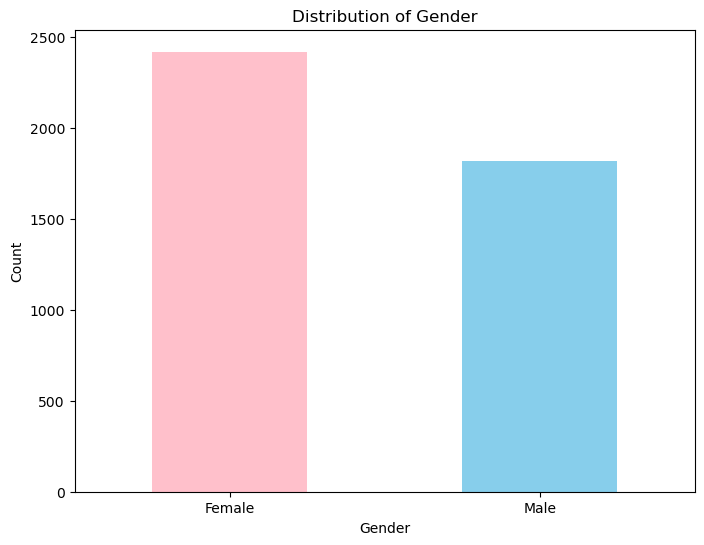

In [9]:
# Bar graph
# Define colors for each gender category
colors = {'Male': 'skyblue', 'Female': 'pink'}

# plt.bar() function from matplotlib.pyplot
plt.figure(figsize=(8, 6))  
gender_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in gender_counts.index])  # Plotting the bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels 
plt.show()

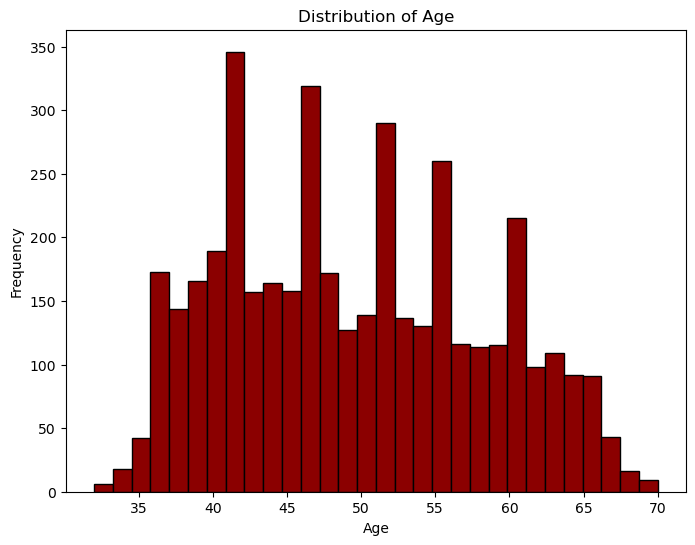

In [10]:
# Histogram
# plt.hist() function from matplotlib.pyplot
plt.figure(figsize=(8, 6))  
plt.hist(heart_disease['age'], bins=30, color='darkred', edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

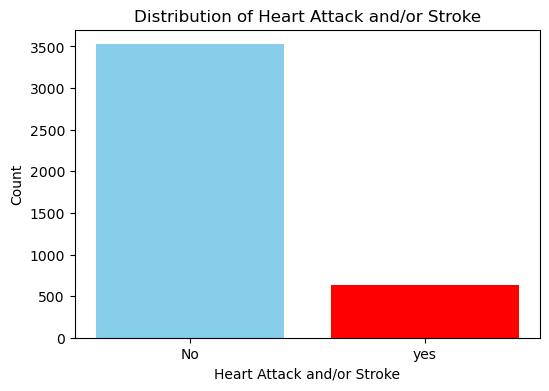

In [11]:
# Bar graph
stroke_counts = heart_disease['heart_stroke'].value_counts()

plt.figure(figsize=(6, 4))  

# Plotting the bar graph
plt.bar(stroke_counts.index, stroke_counts.values, color=['skyblue', 'red'])

# X-axis labels
plt.xlabel('Heart Attack and/or Stroke')
plt.ylabel('Count')
plt.title('Distribution of Heart Attack and/or Stroke')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### Bivariate Analysis

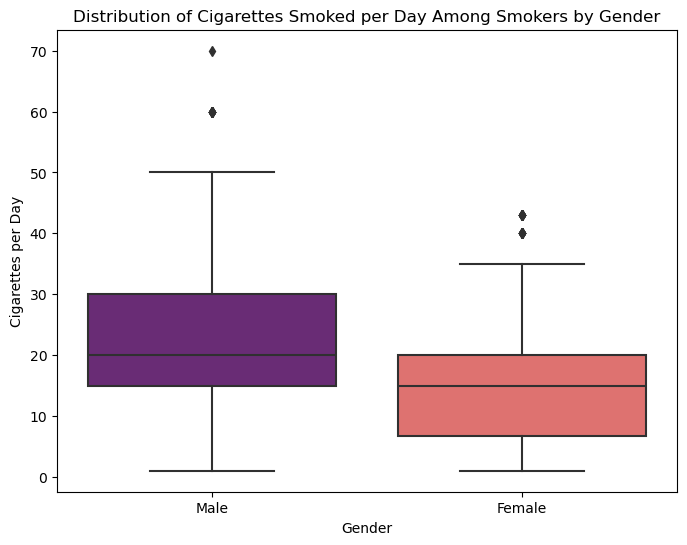

In [13]:
# Box plot
smokers_data = heart_disease[heart_disease['current_smoker'] == 1] 

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size

# Using seaborn for box plot (you can also use plt.boxplot)
sns.boxplot(x='gender', y='cigs_per_day', data=smokers_data, palette='magma')

plt.xlabel('Gender')
plt.ylabel('Cigarettes per Day')
plt.title('Distribution of Cigarettes Smoked per Day Among Smokers by Gender')
plt.show()

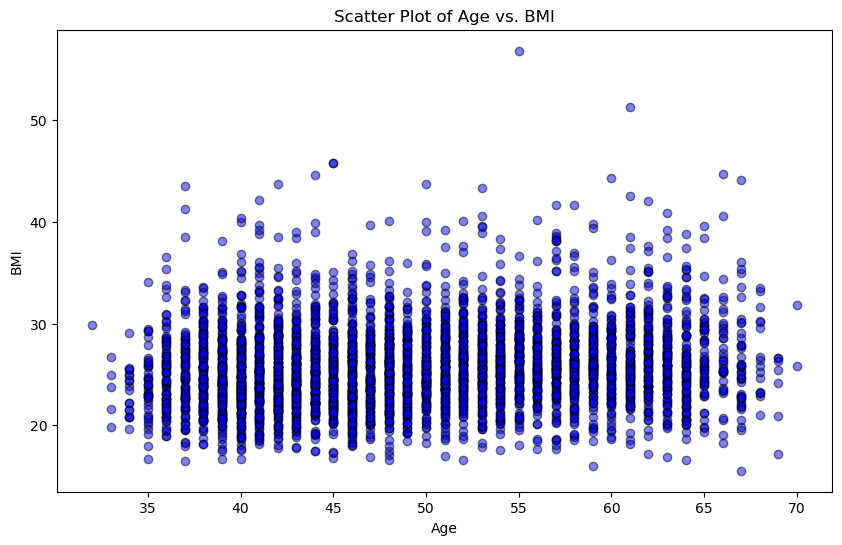

In [14]:
# Scatter plot
plt.figure(figsize=(10, 6)) 

# Plotting the scatter plot
plt.scatter(heart_disease['age'], heart_disease['BMI'], alpha=0.5, color='blue', edgecolor='k')

# X and Y axis labels
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs. BMI')
plt.show()

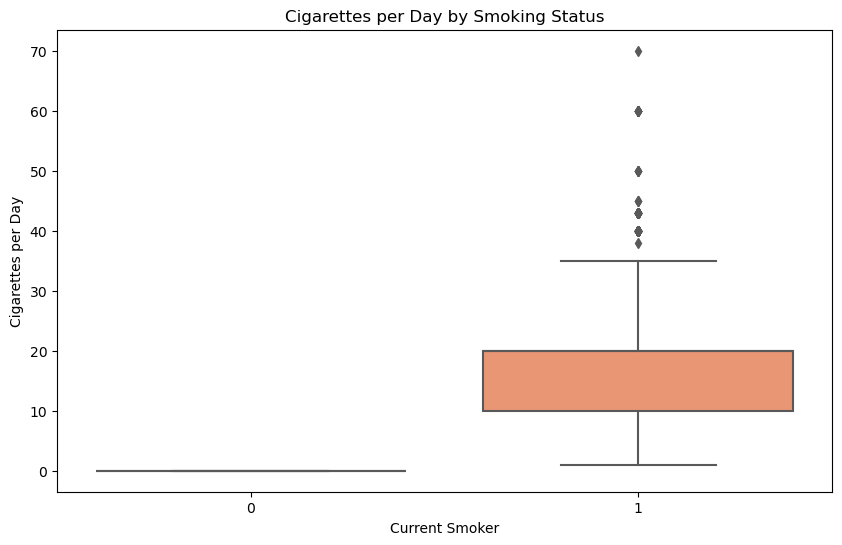

In [15]:
# Box plot
plt.figure(figsize=(10, 6))  

sns.boxplot(x='current_smoker', y='cigs_per_day', data=heart_disease, palette='Set2')

plt.xlabel('Current Smoker')
plt.ylabel('Cigarettes per Day')
plt.title('Cigarettes per Day by Smoking Status')

plt.show()

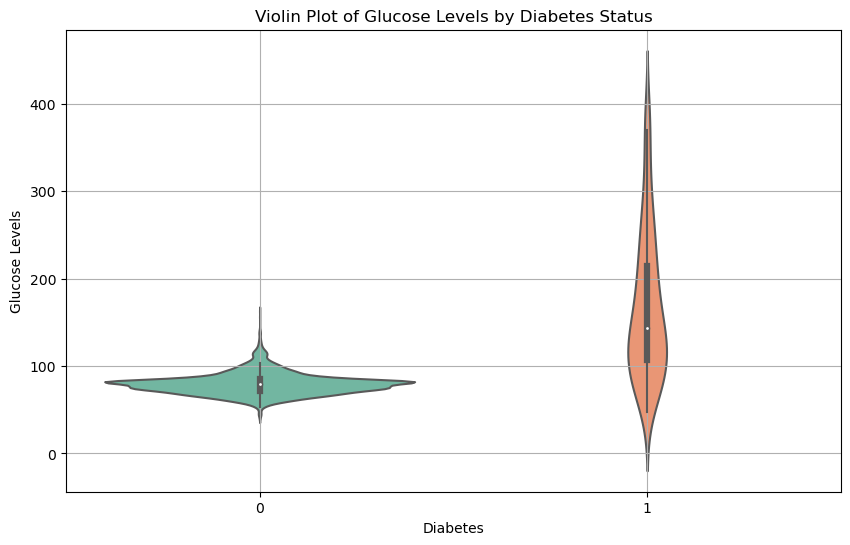

In [16]:
# Violin plot
plt.figure(figsize=(10, 6))  
sns.violinplot(x='diabetes', y='glucose', data=heart_disease, palette='Set2')

plt.xlabel('Diabetes')
plt.ylabel('Glucose Levels')
plt.title('Violin Plot of Glucose Levels by Diabetes Status')
plt.grid(True)
plt.show()

### Multivariate Analysis

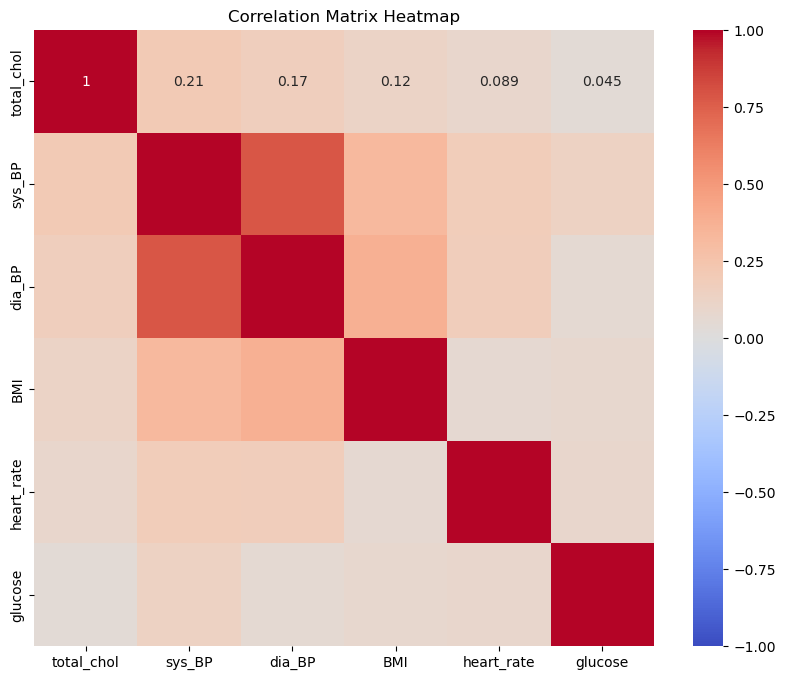

In [18]:
# Heatmap
# Calculate the correlation matrix
continuous_vars = ['total_chol', 'sys_BP', 'dia_BP', 'BMI', 'heart_rate', 'glucose']
data = heart_disease[continuous_vars]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix Heatmap')
plt.show()

### Imbalanced data

In [ ]:
# Notes: 
# heart_stroke column is target column for ML model
# Need to fix the balance first because it is imbalanced(see the bar graph - contains wide variety of no and yes)
# How to balance? check out the lab, there is upsampling, down sampling, oversampling, undersampling, and SMOTE
# Recommends to use SMOTE - is a way of oversampling, but instead of duplicating the data that is already there, it makes new data according to the neighbors(uses K and N)

# What are we trying to predict: is this person at risk for heart disease?
# heart/stroke - refers to having some sort of heart issue(i.e. either heart attack or stroke)

In [23]:
# Encode categorical variables
label_encoder = LabelEncoder()
heart_disease['gender'] = label_encoder.fit_transform(heart_disease['gender'])
heart_disease['education'] = label_encoder.fit_transform(heart_disease['education'])
heart_disease['prevalent_stroke'] = label_encoder.fit_transform(heart_disease['prevalent_stroke'])
heart_disease['heart_stroke'] = label_encoder.fit_transform(heart_disease['heart_stroke'])  # Target variable

# Split the data into features and target variable
X = heart_disease.drop('heart_stroke', axis=1)
y = heart_disease['heart_stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data with k_neighbors=10
smote = SMOTE(k_neighbors=10, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### ML Model - Classification

In [28]:
# Feature scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# # Initialize and train the classifier - Logistic Regression
# classifier = LogisticRegression()
# classifier.fit(X_train_resampled, y_train_resampled)

# # Make predictions
# y_pred = classifier.predict(X_test)

# # Evaluate the classifier
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{class_report}')
# print(f'ROC-AUC: {roc_auc}')

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Train and evaluate each classifier
results = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results[clf_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report,
        'roc_auc': roc_auc
    }

    print(f'Classifier: {clf_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')
    if roc_auc is not None:
        print(f'ROC-AUC: {roc_auc}')
    print('\n')




Classifier: Logistic Regression
Accuracy: 0.6161251504211793
Confusion Matrix:
[[445 260]
 [ 59  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       705
           1       0.20      0.53      0.30       126

    accuracy                           0.62       831
   macro avg       0.54      0.58      0.52       831
weighted avg       0.78      0.62      0.67       831

ROC-AUC: 0.644939772599347


Classifier: Decision Tree
Accuracy: 0.6762936221419976
Confusion Matrix:
[[530 175]
 [ 94  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       705
           1       0.15      0.25      0.19       126

    accuracy                           0.68       831
   macro avg       0.50      0.50      0.49       831
weighted avg       0.74      0.68      0.71       831

ROC-AUC: 0.502870651806822


Classifier: Random Forest
Accuracy: 0.793020

In [ ]:
# Use logistic regression, bc it has higher recall. Predicting heart disease is sort of 
# like a life or death situation. So even tho random forest has better accuracy, better 
# recall is better for this scenario

# Chatgpt
# If identifying as many "Yes" cases as possible is crucial, Logistic Regression might be a better choice due to its higher recall for "Yes".